# 1. Выбор набора данных


In [1]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('winequality-red.csv', delimiter=';')

dataset.head()

X = dataset.drop(columns=['quality'])
y = dataset['quality']

features = X.columns.values.tolist()
targets = pd.Series(y).unique()
targets = np.sort(targets)

print(features)
print(X.iloc[[0]].values)
print(targets)
print(y[0])


['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
[[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
   0.56    9.4   ]]
[3 4 5 6 7 8]
5


In [2]:
dataset.iloc[[20,30,40,50,60,70,41,52,63,74]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
20,8.9,0.220,0.48,1.8,0.077,29.0,60.0,0.9968,3.39,0.53,9.4,6
30,6.7,0.675,0.07,2.4,0.089,17.0,82.0,0.9958,3.35,0.54,10.1,5
40,7.3,0.450,0.36,5.9,0.074,12.0,87.0,0.9978,3.33,0.83,10.5,5
50,8.8,0.660,0.26,1.7,0.074,4.0,23.0,0.9971,3.15,0.74,9.2,5
60,8.8,0.400,0.40,2.2,0.079,19.0,52.0,0.9980,3.44,0.64,9.2,5
70,7.7,0.630,0.08,1.9,0.076,15.0,27.0,0.9967,3.32,0.54,9.5,6
41,8.8,0.610,0.30,2.8,0.088,17.0,46.0,0.9976,3.26,0.51,9.3,4
52,6.6,0.500,0.04,2.1,0.068,6.0,14.0,0.9955,3.39,0.64,9.4,6
63,7.0,0.735,0.05,2.0,0.081,13.0,54.0,0.9966,3.39,0.57,9.8,5
74,9.7,0.320,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5


# 2. Обучение дерева решений

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 4
model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(X, y)
pred = model.predict(X)

print(accuracy_score(y, pred))

0.6303939962476548


In [4]:
pred[:5]

array([5, 5, 5, 6, 5])

In [5]:
from joblib import dump

dump(model, 'tree1.joblib')

['tree1.joblib']

# 3. Визуализация дерева

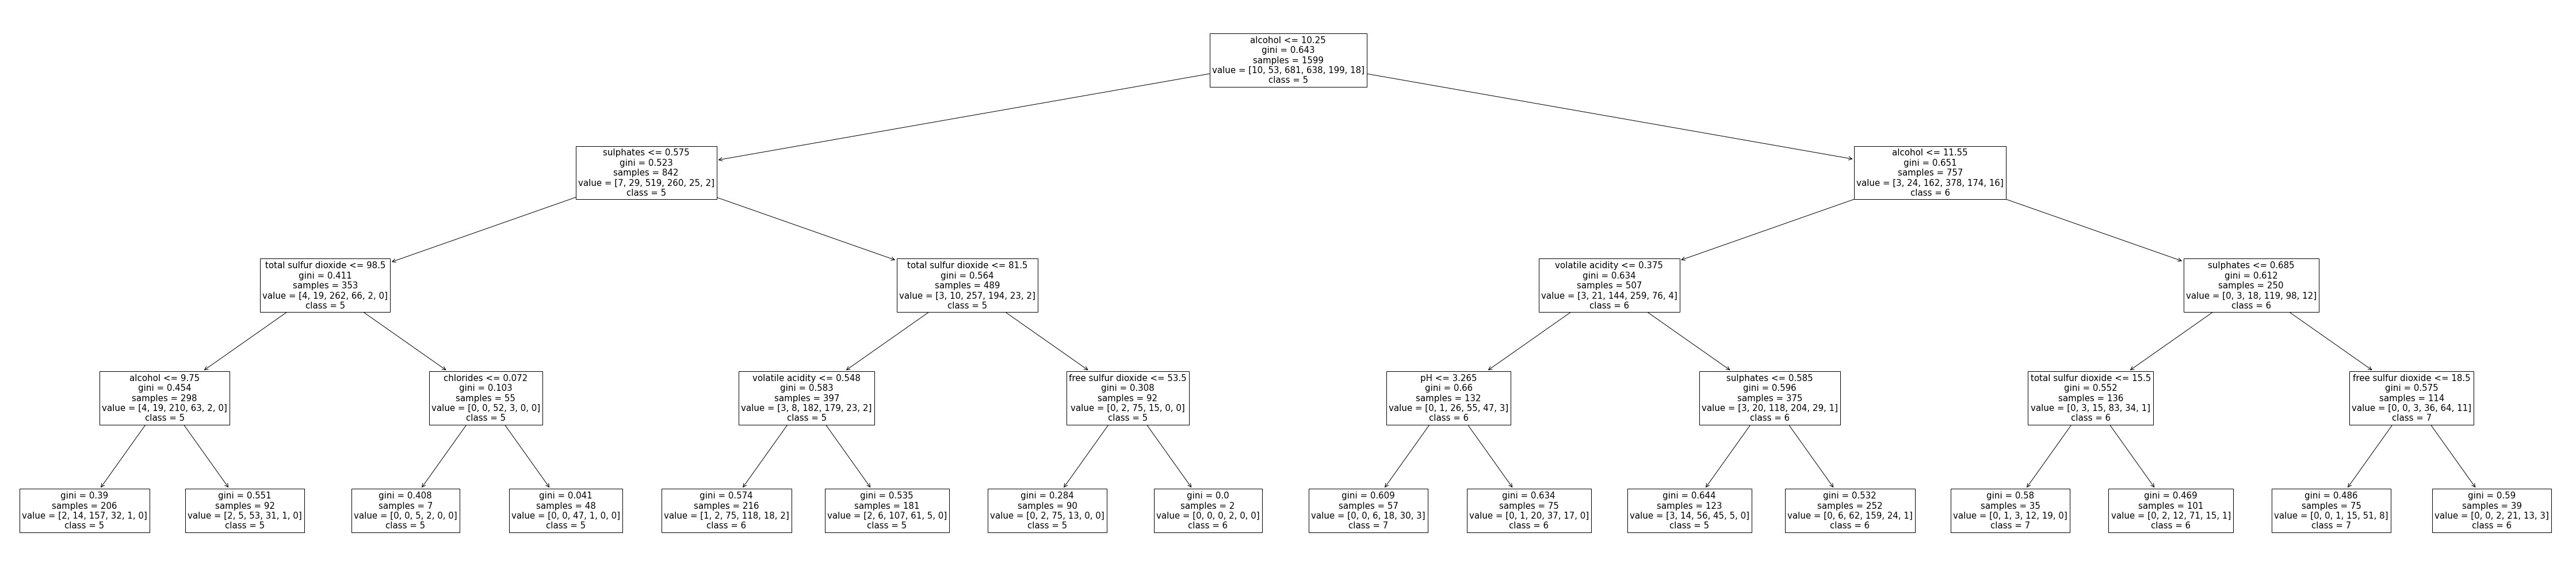

In [6]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(80, 18))
tree.plot_tree(model,
                feature_names=features,
                class_names=[str(t) for t in targets], 
                fontsize=15)
fig.savefig("tree1.png")
fig.show()

# 4. Описание дерева на Datalog

In [7]:
# !pip install pydatalog
from pyDatalog import pyDatalog
pyDatalog.clear()

In [8]:
pyDatalog.create_terms('U, V, fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol, label')

In [9]:
(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575)
(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] <= 81.5) & (volatile_acidity[U] <= 0.548)
(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] <= 81.5) & (volatile_acidity[U] > 0.548)
(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] > 81.5) & (residual_sugar[U] <= 14.6)
(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] > 81.5) & (residual_sugar[U] > 14.6)
(label[U] == '7') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] <= 0.375) & (pH[U] <= 3.265)
(label[U] == '6') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] <= 0.375) & (pH[U] > 3.265)
(label[U] == '5') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] > 0.375) & (sulphates[U] <= 0.585)
(label[U] == '6') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] > 0.375) & (sulphates[U] > 0.585) 
(label[U] == '7') <= (alcohol[U] > 11.55) & (sulphates[U] <= 0.685) & (total_sulfur_dioxide[U] <= 15.5)
(label[U] == '6') <= (alcohol[U] > 11.55) & (sulphates[U] <= 0.685) & (total_sulfur_dioxide[U] > 15.5)
(label[U] == '7') <= (alcohol[U] > 11.55) & (sulphates[U] > 0.685) & (free_sulfur_dioxide[U] <= 18.5)
(label[U] == '6') <= (alcohol[U] > 11.55) & (sulphates[U] > 0.685) & (free_sulfur_dioxide[U] > 18.5) 

label[1]==(*,U,'6') <= alcohol[1]>(*,U,'11.55')&su

# 5. Тестирование классификации

In [10]:
# 1
alcohol[1] = 9
sulphates[1] = 0.5
print(label[1] == U)
print()

# 2
alcohol[2] = 10
sulphates[2] = 0.6
total_sulfur_dioxide[2] = 80
volatile_acidity[2] = 0.5
print(label[2] == U)
print()

# 3
alcohol[3] = 11
volatile_acidity[3] = 0.35
pH[3] = 3.25
print(label[3] == U)
print()

# 4
alcohol[4] = 11
volatile_acidity[4] = 0.4
sulphates[4] = 0.6
print(label[4] == U)
print()

# 5
alcohol[5] = 12
sulphates[5] = 0.6
total_sulfur_dioxide[5] = 15
print(label[5] == U)
print()

U
-
5

U
-
6

U
-
7

U
-
6

U
-
7



# 6. Динамическое формирование утверждений Datalog

Сформируем дерево большей глубины перед динамическим формированием утверждений

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth = 6
model = DecisionTreeClassifier(max_depth = max_depth)
model.fit(X, y)
pred = model.predict(X)

print(accuracy_score(y, pred))

0.7104440275171983


In [12]:
from joblib import dump

dump(model, 'tree2.joblib')

['tree2.joblib']

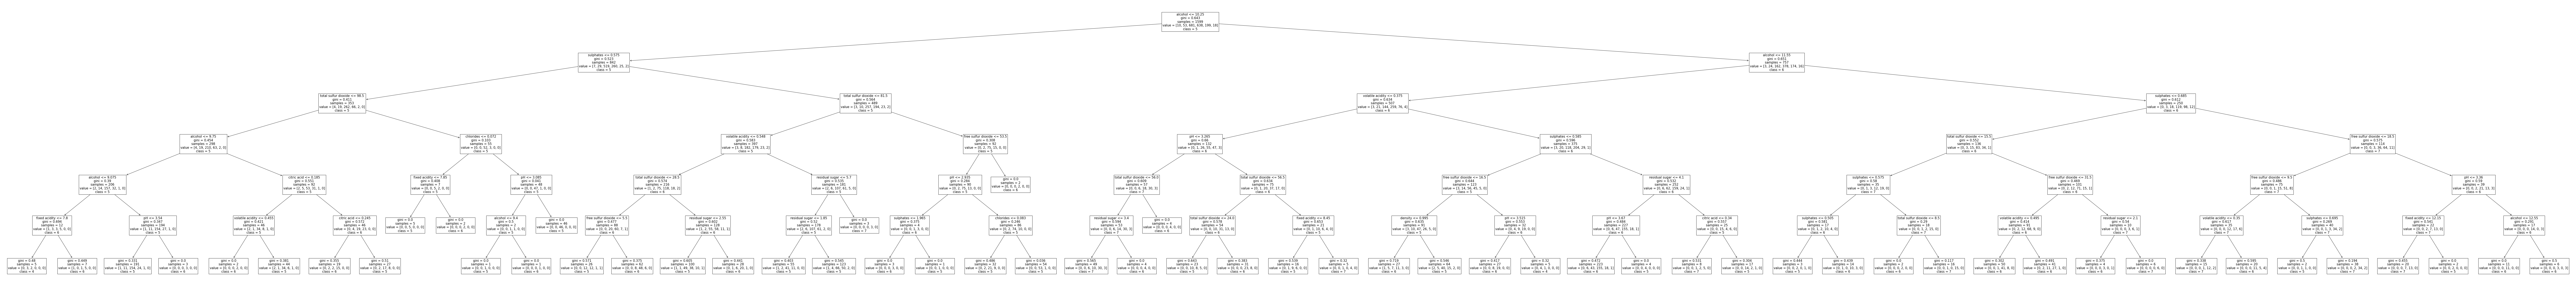

In [13]:
from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(220, 25))
tree.plot_tree(model,
                feature_names=features,
                class_names=[str(t) for t in targets], 
                fontsize=15)
fig.savefig("tree2.png")
fig.show()

Выполним автоматическое формирование утверждений

In [14]:
from joblib import load
import sklearn

model = load('tree2.joblib')
classes = model.classes_
tree = model.tree_

n_nodes = tree.node_count
children_left = tree.children_left
children_right = tree.children_right
feature = tree.feature
threshold = tree.threshold
value = tree.value

In [15]:
def get_paths(paths):
  for path in paths:
    left = children_left[path[-1]]
    right = children_right[path[-1]]
    if left != right:
      paths.remove(path)
      paths.append(path + [left])
      paths.append(path + [right])
      get_paths(paths)
  return paths

paths = [[0]]
paths = get_paths(paths)
paths

[[0, 1, 27, 41, 49],
 [0, 1, 2, 18, 19, 20],
 [0, 1, 2, 18, 19, 21],
 [0, 1, 2, 18, 22, 26],
 [0, 1, 27, 28, 36, 40],
 [0, 50, 51, 52, 53, 57],
 [0, 1, 2, 3, 4, 5, 6],
 [0, 1, 2, 3, 4, 5, 7],
 [0, 1, 2, 3, 4, 8, 9],
 [0, 1, 2, 3, 4, 8, 10],
 [0, 1, 2, 3, 11, 12, 13],
 [0, 1, 2, 3, 11, 12, 14],
 [0, 1, 2, 3, 11, 15, 16],
 [0, 1, 2, 3, 11, 15, 17],
 [0, 1, 2, 18, 22, 23, 24],
 [0, 1, 2, 18, 22, 23, 25],
 [0, 1, 27, 28, 29, 30, 31],
 [0, 1, 27, 28, 29, 30, 32],
 [0, 1, 27, 28, 29, 33, 34],
 [0, 1, 27, 28, 29, 33, 35],
 [0, 1, 27, 28, 36, 37, 38],
 [0, 1, 27, 28, 36, 37, 39],
 [0, 1, 27, 41, 42, 43, 44],
 [0, 1, 27, 41, 42, 43, 45],
 [0, 1, 27, 41, 42, 46, 47],
 [0, 1, 27, 41, 42, 46, 48],
 [0, 50, 51, 52, 53, 54, 55],
 [0, 50, 51, 52, 53, 54, 56],
 [0, 50, 51, 52, 58, 59, 60],
 [0, 50, 51, 52, 58, 59, 61],
 [0, 50, 51, 52, 58, 62, 63],
 [0, 50, 51, 52, 58, 62, 64],
 [0, 50, 51, 65, 66, 67, 68],
 [0, 50, 51, 65, 66, 67, 69],
 [0, 50, 51, 65, 66, 70, 71],
 [0, 50, 51, 65, 66, 70, 72],
 [0, 

In [16]:
rules = []
for path in paths:
  conjs = []
  for i in range(len(path)):
    node = path[i]
    if node == path[-1]:
      samples = list(value[node][0])
      label = samples.index(max(samples))
    else:
      conj = {'feature': feature[node],
              'threshold': round(threshold[node], 3)}
      child = path[i+1]
      if child in children_left:
        conj['comparison'] = '<='
      else:
        conj['comparison'] = '>'
      conjs.append(conj)
  rules.append({'label':label, 'conjs': conjs})

rules

[{'label': 3,
  'conjs': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.575, 'comparison': '>'},
   {'feature': 6, 'threshold': 81.5, 'comparison': '>'},
   {'feature': 5, 'threshold': 53.5, 'comparison': '>'}]},
 {'label': 2,
  'conjs': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.575, 'comparison': '<='},
   {'feature': 6, 'threshold': 98.5, 'comparison': '>'},
   {'feature': 4, 'threshold': 0.072, 'comparison': '<='},
   {'feature': 0, 'threshold': 7.85, 'comparison': '<='}]},
 {'label': 3,
  'conjs': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'threshold': 0.575, 'comparison': '<='},
   {'feature': 6, 'threshold': 98.5, 'comparison': '>'},
   {'feature': 4, 'threshold': 0.072, 'comparison': '<='},
   {'feature': 0, 'threshold': 7.85, 'comparison': '>'}]},
 {'label': 2,
  'conjs': [{'feature': 10, 'threshold': 10.25, 'comparison': '<='},
   {'feature': 9, 'thresh

In [17]:
def format_name(name):
  name = str(name)
  name = name.replace(' ', '_')
  name = name.replace('(', '')
  name = name.replace(')', '')
  return name

feature_names = [format_name(X) for X in features]
class_names = [f"'{X}'" for X in targets]

print(feature_names)
print(class_names)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol']
["'3'", "'4'", "'5'", "'6'", "'7'", "'8'"]


In [18]:
tmplts = []
for rule in rules:
  label = class_names[rule['label']]
  tmplt_label = f'(label[U] == {label})'
  conjs = rule['conjs']
  if conjs:
    conds = []
    for conj in conjs:
      f_name = feature_names[conj['feature']]
      conds.append(f'({f_name}[U] {conj["comparison"]} {conj["threshold"]})')
    tmplt_cond = ' & '.join(conds)
    tmplts.append(f'{tmplt_label} <= {tmplt_cond}')
  else:
    tmplts.append(tmplt_label)

tmplts

["(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] > 81.5) & (free_sulfur_dioxide[U] > 53.5)",
 "(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] <= 0.072) & (fixed_acidity[U] <= 7.85)",
 "(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] <= 0.072) & (fixed_acidity[U] > 7.85)",
 "(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] > 0.072) & (pH[U] > 3.085)",
 "(label[U] == '7') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] <= 81.5) & (volatile_acidity[U] > 0.548) & (residual_sugar[U] > 5.7)",
 "(label[U] == '6') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] <= 0.375) & (pH[U] <= 3.265) & (total_sulfur_dioxide[U] > 56.0)",
 "(label[U] == '4') <= (alcohol[U] <= 10.25) & (sulphates[

In [19]:
from pyDatalog import pyDatalog
pyDatalog.clear()

feature_indices = [X for X in set(feature) if X>=0]
print(feature_indices)
predicates = ', '.join([feature_names[X] for X in feature_indices])
pyDatalog.create_terms('U, V, label, ' + predicates)
print(predicates)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, pH, sulphates, alcohol


In [20]:
knowledge = """\n""".join(tmplts)
pyDatalog.load(knowledge)
print(knowledge)

(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] > 81.5) & (free_sulfur_dioxide[U] > 53.5)
(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] <= 0.072) & (fixed_acidity[U] <= 7.85)
(label[U] == '6') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] <= 0.072) & (fixed_acidity[U] > 7.85)
(label[U] == '5') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulfur_dioxide[U] > 98.5) & (chlorides[U] > 0.072) & (pH[U] > 3.085)
(label[U] == '7') <= (alcohol[U] <= 10.25) & (sulphates[U] > 0.575) & (total_sulfur_dioxide[U] <= 81.5) & (volatile_acidity[U] > 0.548) & (residual_sugar[U] > 5.7)
(label[U] == '6') <= (alcohol[U] > 10.25) & (alcohol[U] <= 11.55) & (volatile_acidity[U] <= 0.375) & (pH[U] <= 3.265) & (total_sulfur_dioxide[U] > 56.0)
(label[U] == '4') <= (alcohol[U] <= 10.25) & (sulphates[U] <= 0.575) & (total_sulf

# 7. Тестирование динамически сформированных правил

In [21]:
S=[1, 9, 17, 42, 95, 1450, 1452]
row = X.iloc[S]
rows = row.values.tolist()

r = 0
for row in rows:
  print(f'\nrow {S[r]}')
  for i in feature_indices:
    fact = f'{feature_names[i]}[{S[r]}] = {row[i]}'
    print(fact)
    exec(fact)
  r+=1


row 1
fixed_acidity[1] = 7.8
volatile_acidity[1] = 0.88
citric_acid[1] = 0.0
residual_sugar[1] = 2.6
chlorides[1] = 0.098
free_sulfur_dioxide[1] = 25.0
total_sulfur_dioxide[1] = 67.0
density[1] = 0.9968
pH[1] = 3.2
sulphates[1] = 0.68
alcohol[1] = 9.8

row 9
fixed_acidity[9] = 7.5
volatile_acidity[9] = 0.5
citric_acid[9] = 0.36
residual_sugar[9] = 6.1
chlorides[9] = 0.071
free_sulfur_dioxide[9] = 17.0
total_sulfur_dioxide[9] = 102.0
density[9] = 0.9978
pH[9] = 3.35
sulphates[9] = 0.8
alcohol[9] = 10.5

row 17
fixed_acidity[17] = 8.1
volatile_acidity[17] = 0.56
citric_acid[17] = 0.28
residual_sugar[17] = 1.7
chlorides[17] = 0.368
free_sulfur_dioxide[17] = 16.0
total_sulfur_dioxide[17] = 56.0
density[17] = 0.9968
pH[17] = 3.11
sulphates[17] = 1.28
alcohol[17] = 9.3

row 42
fixed_acidity[42] = 7.5
volatile_acidity[42] = 0.49
citric_acid[42] = 0.2
residual_sugar[42] = 2.6
chlorides[42] = 0.332
free_sulfur_dioxide[42] = 8.0
total_sulfur_dioxide[42] = 14.0
density[42] = 0.9968
pH[42] = 3.21

In [22]:
print(pyDatalog.ask('label[U] == V'))

{(1450, '7'), (1, '5'), (95, '6'), (42, '6'), (1452, '7'), (17, '5'), (9, '5')}
